In [25]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [31]:
df1 = pd.read_csv('Slammer.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,8,46,4,88,13,6,12,...,1,0,0,0,0,41,0,5,243,-1
1,1,0,1,4,40,4,161,28,6,8,...,0,0,0,0,0,34,0,6,287,-1
2,2,0,2,0,59,7,133,69,6,13,...,0,1,0,0,0,55,0,4,256,-1
3,3,0,3,12,52,4,138,32,5,7,...,0,0,0,0,0,48,0,4,263,-1
4,4,0,4,9,49,2,119,24,6,9,...,0,0,0,0,0,46,0,3,252,-1


In [32]:
df1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [35]:
features = df1.loc[:, 4:40]

In [36]:
df1.iloc[:, 41].value_counts()

-1    6331
 1     869
Name: 41, dtype: int64

In [37]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [38]:
def targetify(s):
    if s == -1:
        return 0
    else:
        return 1

In [39]:
df1['Target']=df1.loc[:,41].apply(targetify)

In [40]:
 y = df1['Target']

In [41]:
df1["Target"].value_counts()

0    6331
1     869
Name: Target, dtype: int64

In [42]:
X = X.fillna(0)

In [43]:
X = X.apply(pd.to_numeric, errors='coerce')

In [44]:
X = X.fillna(0)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(5760, 37) (5760,)
(1440, 37) (1440,)


In [47]:
y_train.value_counts()

0    5058
1     702
Name: Target, dtype: int64

In [48]:
y_test.value_counts()

0    1273
1     167
Name: Target, dtype: int64

In [53]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
6465,48,5,202,15,6,12,6,6,177,2,...,0,1,0,0,0,0,43,3,2,288
4234,55,6,110,60,6,11,6,4,56,15,...,1,0,0,0,0,0,46,0,9,246
4763,62,7,100,22,6,17,6,3,48,2,...,0,0,0,0,0,0,57,0,5,226
4973,34,2,99,4,6,12,6,1,45,1,...,0,1,0,0,0,0,34,0,0,261
5812,35,6,102,46,6,13,6,0,33,18,...,0,0,1,0,0,0,33,0,2,271


In [49]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [55]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [56]:
importances = forest.feature_importances_

In [57]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [58]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 33: 37 (0.115616)
2. feature 0: 4 (0.112353)
3. feature 35: 39 (0.101642)
4. feature 2: 6 (0.094908)
5. feature 8: 12 (0.084063)
6. feature 7: 11 (0.073038)
7. feature 9: 13 (0.071812)
8. feature 3: 7 (0.071492)
9. feature 1: 5 (0.043085)
10. feature 11: 15 (0.030686)
11. feature 36: 40 (0.029026)
12. feature 5: 9 (0.024441)
13. feature 12: 16 (0.023337)
14. feature 6: 10 (0.019854)
15. feature 4: 8 (0.018618)
16. feature 10: 14 (0.017776)
17. feature 19: 23 (0.015858)
18. feature 34: 38 (0.008840)
19. feature 27: 31 (0.003742)
20. feature 25: 29 (0.003687)
21. feature 20: 24 (0.003571)
22. feature 28: 32 (0.003381)
23. feature 13: 17 (0.003259)
24. feature 14: 18 (0.003164)
25. feature 16: 20 (0.003005)
26. feature 30: 34 (0.002750)
27. feature 26: 30 (0.002493)
28. feature 29: 33 (0.002262)
29. feature 18: 22 (0.002031)
30. feature 15: 19 (0.001963)
31. feature 17: 21 (0.001860)
32. feature 31: 35 (0.001587)
33. feature 32: 36 (0.001524)
34. feature 21: 25

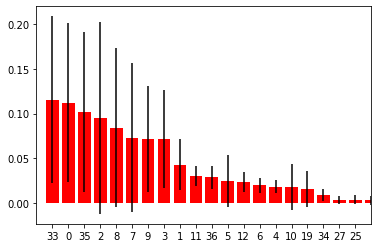

In [59]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

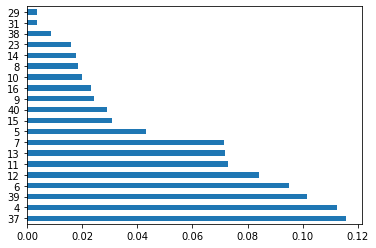

In [60]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")